 #  A Whale off the Port(folio)
 ---

In this assignment, we are looking to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, we will read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, we will combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

To read the Whale Portfolio daily returns and clean the data.

In [2]:
# Set the file Paths:

whl_ret = Path("whale_returns.csv")
algo_ret = Path("algo_returns.csv")
sp_tsx_hist = Path("sp_tsx_history.csv")

In [3]:
# Reading whale returns
whl_df = pd.read_csv(whl_ret, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [4]:
# Count nulls
whl_df.count()
whl_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whl_df = whl_df.dropna().copy()
whl_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
# Checking null counts for each column again to make sure the null values have been dropped
whl_df.isnull()
whl_df.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

## Algorithmic Daily Returns

To read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_df = pd.read_csv(algo_ret, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [8]:
# Count nulls
algo_df.count()
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [10]:
# Checking null counts for each column again to make sure the null values have been dropped
algo_df.isnull()
algo_df.count()

Algo 1    1235
Algo 2    1235
dtype: int64

## S&P TSX 60 Returns

To read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P TSX 60 Closing Prices
sp_df = pd.read_csv(sp_tsx_hist, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [12]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp_df["Close"] = sp_df["Close"].str.replace(",","", regex=True).astype(str)
sp_df["Close"] = sp_df["Close"].str.replace("$","", regex=True).astype(str)
sp_df

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [14]:
# Convert str data type to integer
sp_df["Close"] = sp_df["Close"].astype(float)
sp_df

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [15]:
# Calculate Daily Returns
sp_df = sp_df.pct_change()
sp_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [16]:
# Drop nulls
sp_df = sp_df.dropna().copy()
sp_df

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [17]:
# Rename `Close` Column to be specific to this portfolio.
sp_df = sp_df.rename(columns={
    
    "Close" : "S&P TSX"
})
sp_df.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whl_df,algo_df,sp_df], axis = 1, join = "inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, we are calculating and visualizing the performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

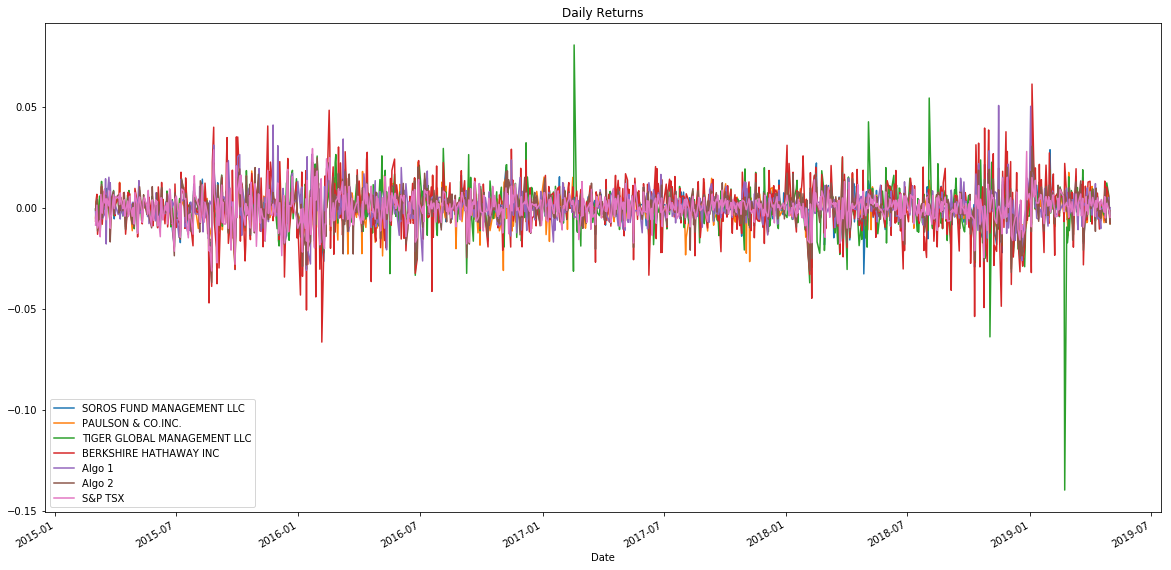

In [19]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

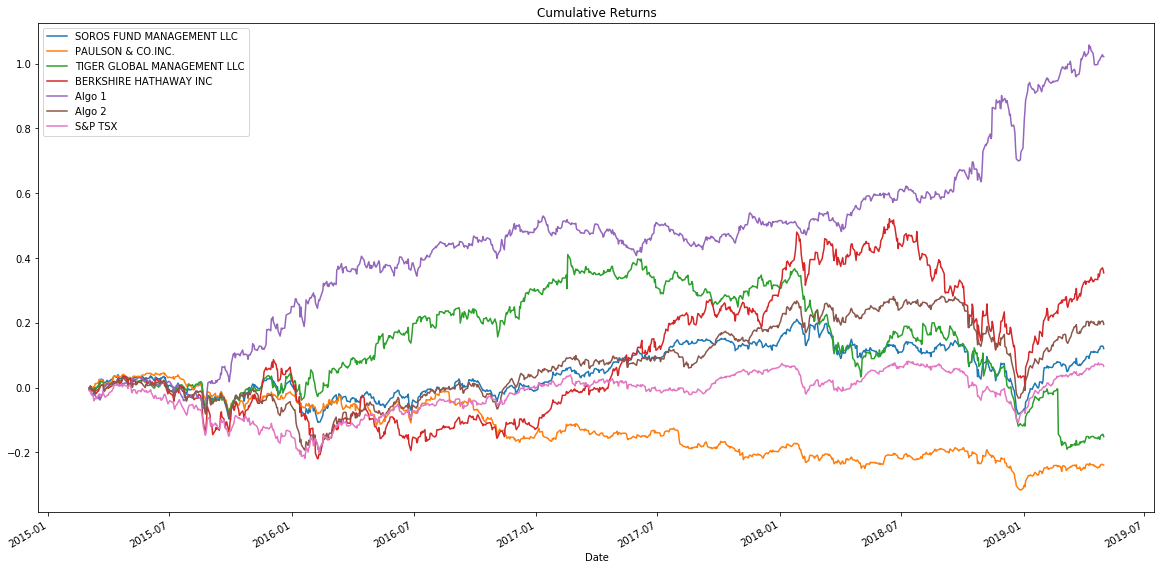

In [20]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

---

## Risk Analysis

Now, to determine the _risk_ of each portfolio:

1. We will create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### To create a box plot for each portfolio

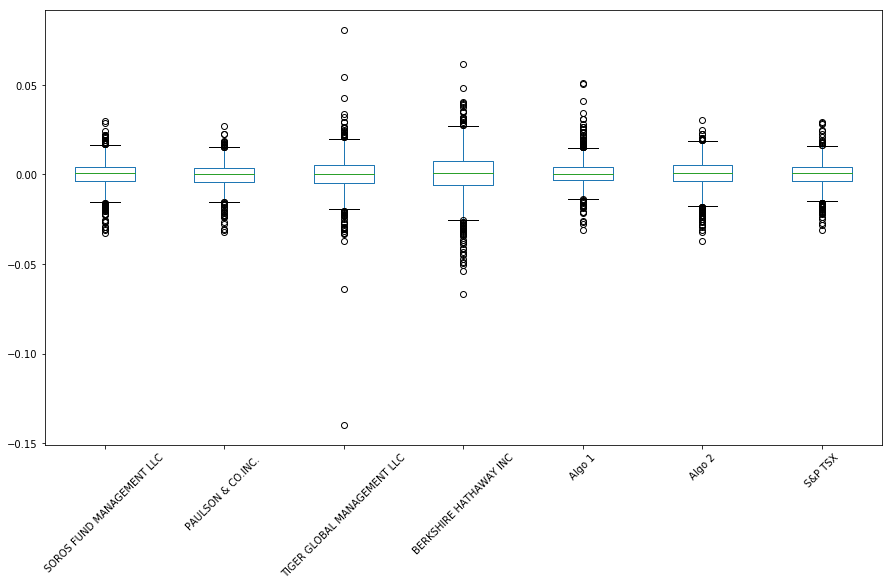

In [21]:
# Box plot to visually show risk
boxplot = combined_df.boxplot(grid=False, rot=45, fontsize=10, figsize=(15,8))

### To calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
volatility = combined_df.std()
volatility

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### To determine which portfolios are riskier than the S&P TSX 60

In [23]:
# Calculate the daily standard deviation of S&P TSX 60
volatility_sp = combined_df['S&P TSX'].std()

# Determine which portfolios are riskier than the S&P TSX 60
combined_df.std()>volatility_sp

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX                        False
dtype: bool

Based on the standard deviation calculation the Algo 1, Soros Fund Management LLC, Algo 2, Tiger Global Management LLC, and Berkshire Hathaway Inc are riskier than the S&P TSX.

### To calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
volatility = combined_df.std() * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

As risk changes over time, we will analyze the rolling statistics for Risk and Beta by: 

1. Calculating and plotting the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculating the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choosing one portfolio, and calculating and plotting the 60-day rolling beta for it and the S&P TSX 60.

### To calculate and plot rolling `std` for all portfolios with 21-day window

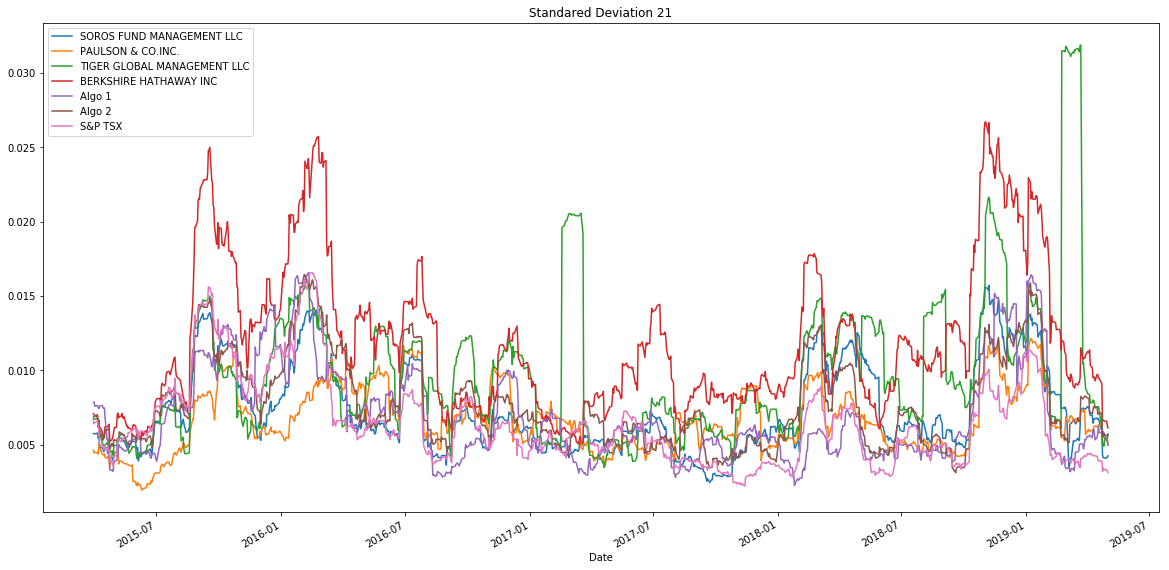

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_dev_21 = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
std_dev_21.plot(figsize=(20,10), title="Standared Deviation 21")

### To calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


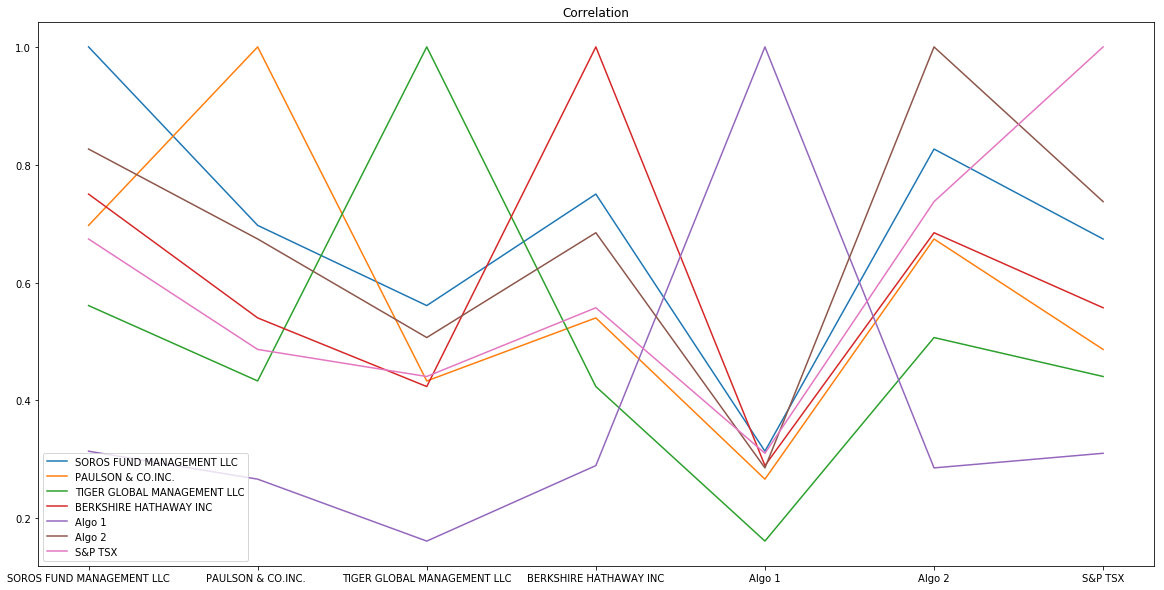

In [26]:
# Calculate the correlation
correlation = combined_df.corr()

# Display de correlation matrix
correlation.plot(figsize=(20,10), title="Correlation")
correlation.style.background_gradient(cmap="Pastel1")

### To calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

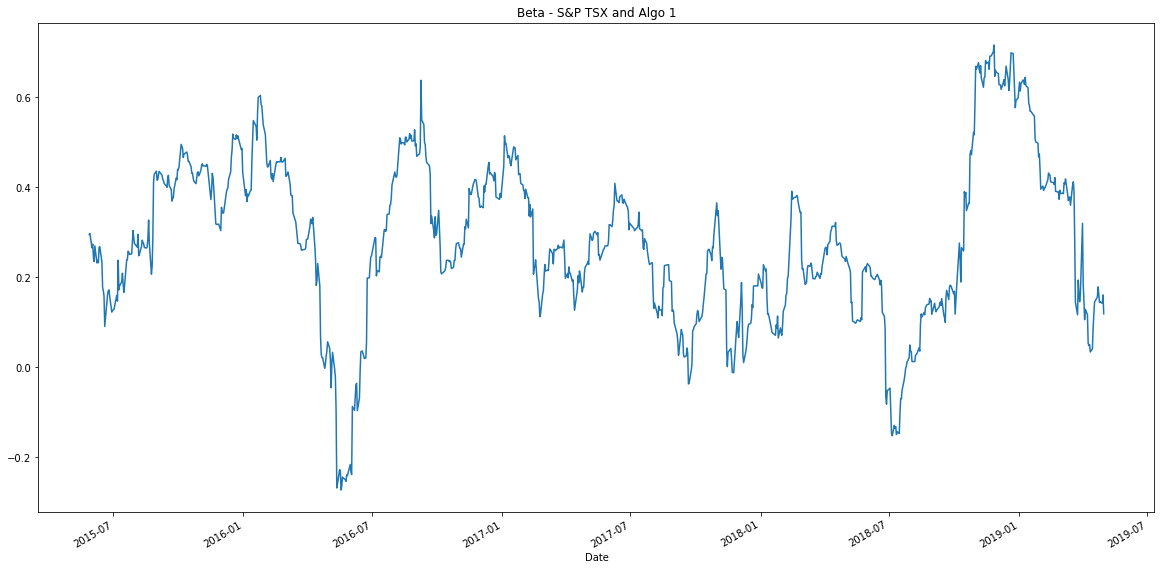

In [27]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&P TSX'])

# Calculate variance of S&P TSX
variance = combined_df['S&P TSX'].rolling(window=60).var()

# Computing beta
beta = rolling_covariance / variance

# Plot beta trend
beta.plot(figsize=(20,10), title="Beta - S&P TSX and Algo 1")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. So we will try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

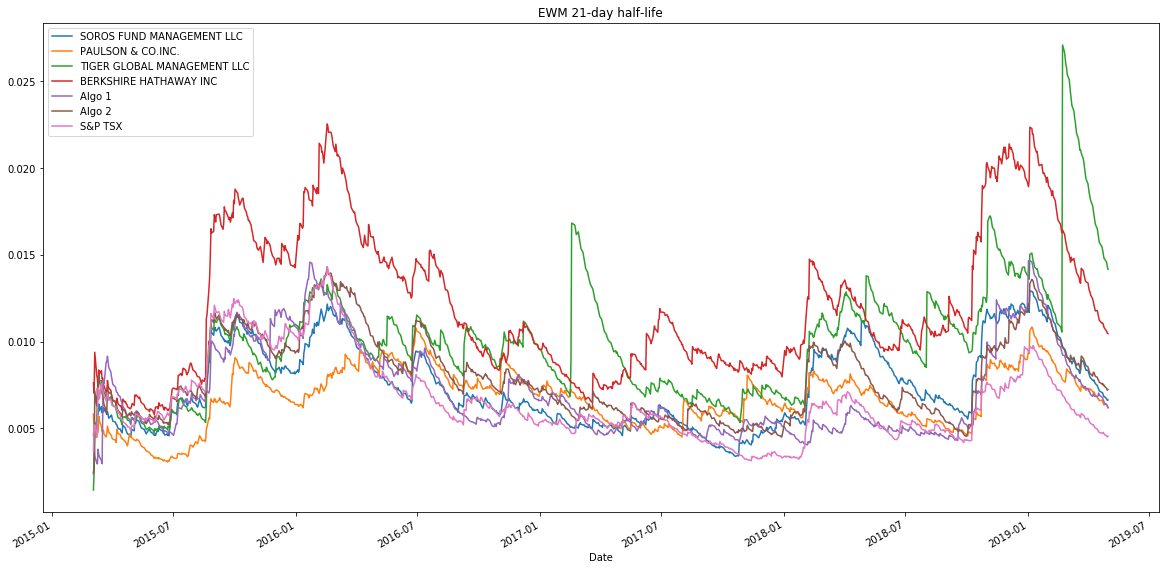

In [28]:
# To use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(20,10), title="EWM 21-day half-life")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, we will calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

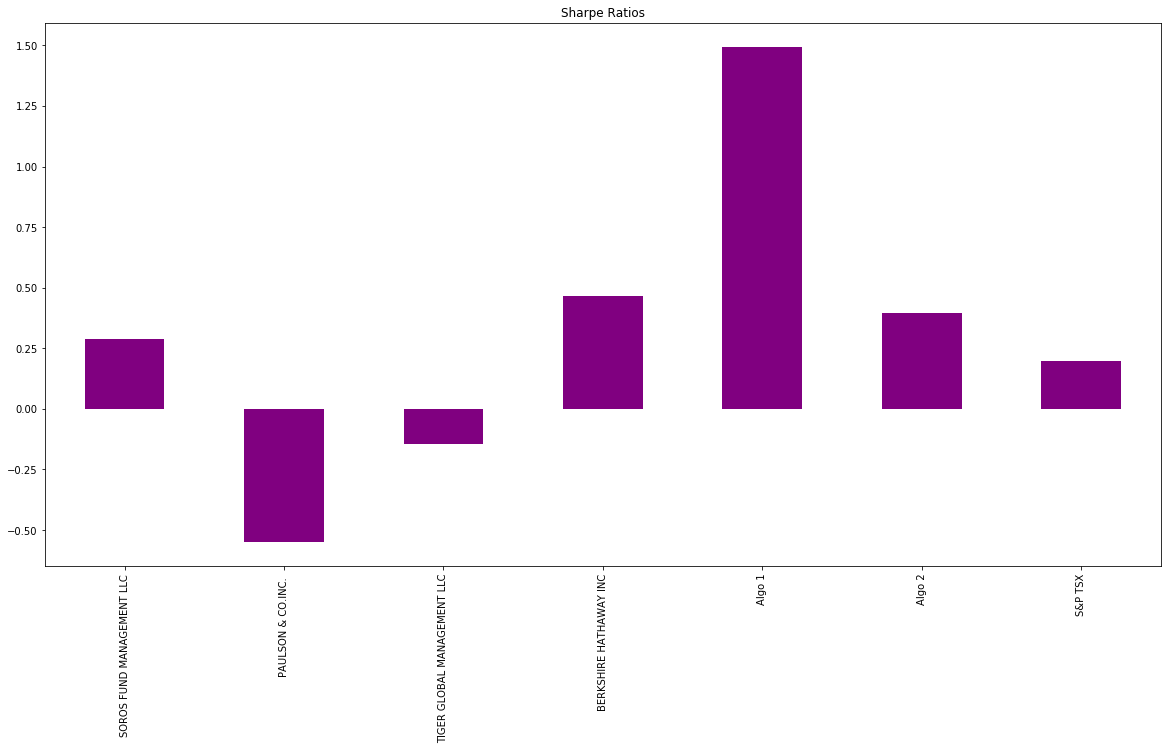

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize=(20,10), color="purple", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The Algorithm Strategies as a portfolio do outperform bot the market (S&P TSX 60) and the Whales portfolio, but it is heavily based on the performance of Algo 1 which significantly outperforms all the portfolios with a sharpe ratio of 1.49. The Algo 2 is however closely behind Berkshire Hathaway Inc with sharpe ratios of 0.37 and 0.47 respectively.  

---

# Create Custom Portfolio

In this section, we will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. We will start by choosing 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join my portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with my portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## To choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this solution, I have fetched data from three companies listed in the NASDAQ index.

* `GOOG` - [Google](https://en.wikipedia.org/wiki/Google)

* `AMZN` - [Amazon](https://en.wikipedia.org/wiki/Amazon_(company))

* `TSLA` - [Tesla Inc](https://en.wikipedia.org/wiki/Tesla,_Inc.)

In [31]:
# Set the file Paths
google = Path("google_historical.csv")
amazon = Path("amazon_historical.csv")
tesla = Path("tesla_historical.csv")

In [32]:
# Reading data from 1st stock
google_df = pd.read_csv(google, index_col="Date", infer_datetime_format=True, parse_dates=True)
google_df

,Close
Date,
2018-01-02,1065.00
2018-01-03,1082.48
2018-01-04,1086.40
2018-01-05,1102.23
2018-01-08,1106.94
...,...
2019-12-20,1349.59
2019-12-23,1348.84
2019-12-24,1343.56


In [33]:
# Rename the Close column to Google
google_df = google_df.rename(columns={
    
    "Close" : "GOOGLE"
})
google_df.head()

,GOOGLE
Date,
2018-01-02,1065.00
2018-01-03,1082.48
2018-01-04,1086.40
2018-01-05,1102.23
2018-01-08,1106.94


In [34]:
# Reading data from 2nd stock
amazon_df = pd.read_csv(amazon, index_col="Date", infer_datetime_format=True, parse_dates=True)
amazon_df

,Close
Date,
2018-01-02,1189.01
2018-01-03,1204.20
2018-01-04,1209.59
2018-01-05,1229.14
2018-01-08,1246.87
...,...
2019-12-20,1786.50
2019-12-23,1793.00
2019-12-24,1789.21


In [35]:
# Rename the Close column to Google
amazon_df = amazon_df.rename(columns={
    
    "Close" : "AMAZON"
})
amazon_df.head()

,AMAZON
Date,
2018-01-02,1189.01
2018-01-03,1204.20
2018-01-04,1209.59
2018-01-05,1229.14
2018-01-08,1246.87


In [36]:
# Reading data from 3rd stock
tesla_df = pd.read_csv(tesla, index_col="Date", infer_datetime_format=True, parse_dates=True)
tesla_df

,Close
Date,
2018-01-02,64.11
2018-01-03,63.45
2018-01-04,62.92
2018-01-05,63.32
2018-01-08,67.28
...,...
2019-12-20,81.12
2019-12-23,83.84
2019-12-24,85.05


In [37]:
# Rename the Close column to TESLA
tesla_df = tesla_df.rename(columns={
    
    "Close" : "TESLA"
})
tesla_df.head()

,TESLA
Date,
2018-01-02,64.11
2018-01-03,63.45
2018-01-04,62.92
2018-01-05,63.32
2018-01-08,67.28


In [38]:
# Combine all stocks in a single DataFrame
combined_df_2 = pd.concat([google_df,amazon_df,tesla_df], axis = "columns", join = "inner")
combined_df_2.head()

,GOOGLE,AMAZON,TESLA
Date,,,
2018-01-02,1065.00,1189.01,64.11
2018-01-03,1082.48,1204.20,63.45
2018-01-04,1086.40,1209.59,62.92
2018-01-05,1102.23,1229.14,63.32
2018-01-08,1106.94,1246.87,67.28


In [39]:
# Reset Date index
#combined_df_2 = combined_df_2.index.date 

In [40]:
# Reorganize portfolio data by having a column per symbol
#combined_df_2.sort_index(inplace=True)
#combined_df_2.head()

In [41]:
# Calculate daily returns
daily_returns = combined_df_2.pct_change()

# Drop NAs
daily_returns = daily_returns.dropna().copy()

# Display sample data
daily_returns

,GOOGLE,AMAZON,TESLA
Date,,,
2018-01-03,0.016413,0.012775,-0.010295
2018-01-04,0.003621,0.004476,-0.008353
2018-01-05,0.014571,0.016163,0.006357
2018-01-08,0.004273,0.014425,0.062539
2018-01-09,-0.000614,0.004676,-0.008026
...,...,...,...
2019-12-20,-0.004756,-0.003225,0.003836
2019-12-23,-0.000556,0.003638,0.033531
2019-12-24,-0.003914,-0.002114,0.014432


## To calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
combined_df_new = daily_returns.dot(weights)

# Display sample data
combined_df_new

Date
2018-01-03    0.006298
2018-01-04   -0.000085
2018-01-05    0.012364
2018-01-08    0.027079
2018-01-09   -0.001322
                ...   
2019-12-20   -0.001382
2019-12-23    0.012204
2019-12-24    0.002801
2019-12-26    0.023468
2019-12-27   -0.002327
Length: 500, dtype: float64

## To join my portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame
combined_df['MY_PORTFOLIO'] = combined_df_new
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,MY_PORTFOLIO
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,NaN
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.012111
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.006044
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.010881


In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df = combined_df.dropna().copy()
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,MY_PORTFOLIO
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.006298
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,-0.000085
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.012364
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.027079
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.001322
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.012111
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.006044
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.010881


## To re-run the risk analysis with your portfolio to see how it compares to the others

### To calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`
volatility_2 = combined_df.std() * np.sqrt(252)
volatility_2

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX                        0.099121
MY_PORTFOLIO                   0.301730
dtype: float64

### To calculate and plot rolling `std` with 21-day window

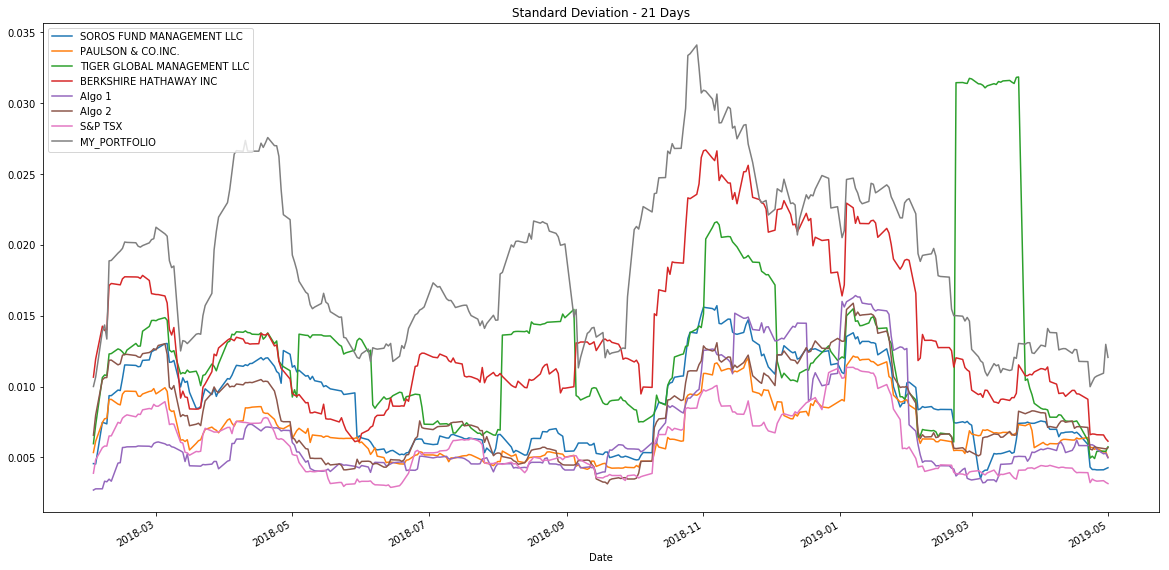

In [46]:
# Calculate rolling standard deviation
std_dev_21_days = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
std_dev_21_days.plot(figsize=(20,10), title="Standard Deviation - 21 Days")

### To calculate and plot the correlation

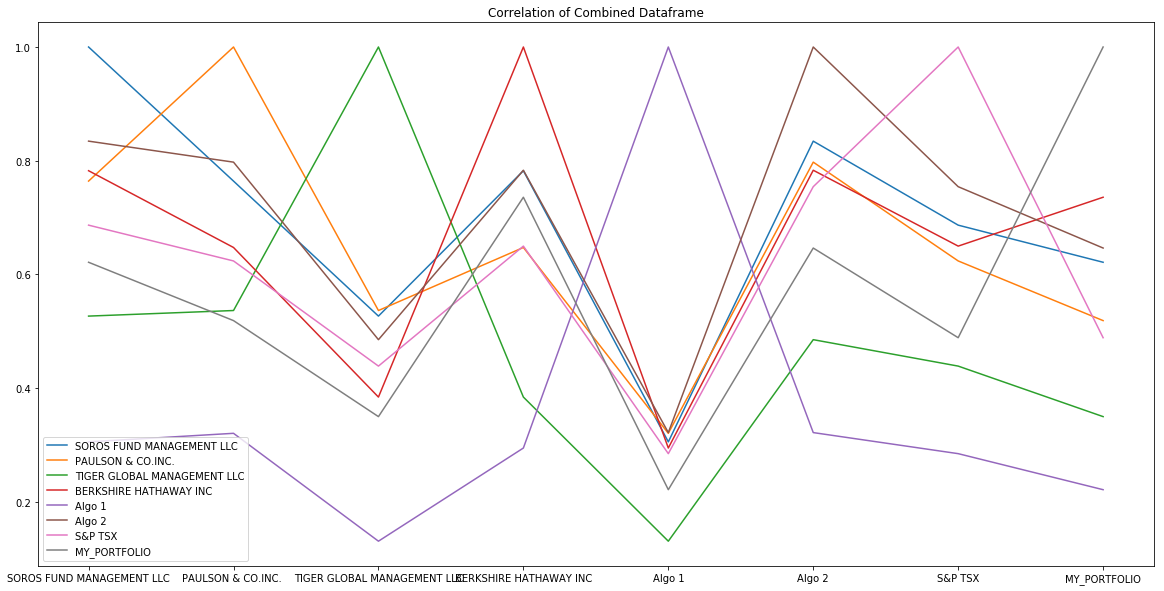

In [47]:
# Calculate and plot the correlation
correlation_2 = combined_df.corr()
correlation_2.plot(figsize=(20,10), title="Correlation of Combined Dataframe")

### To calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

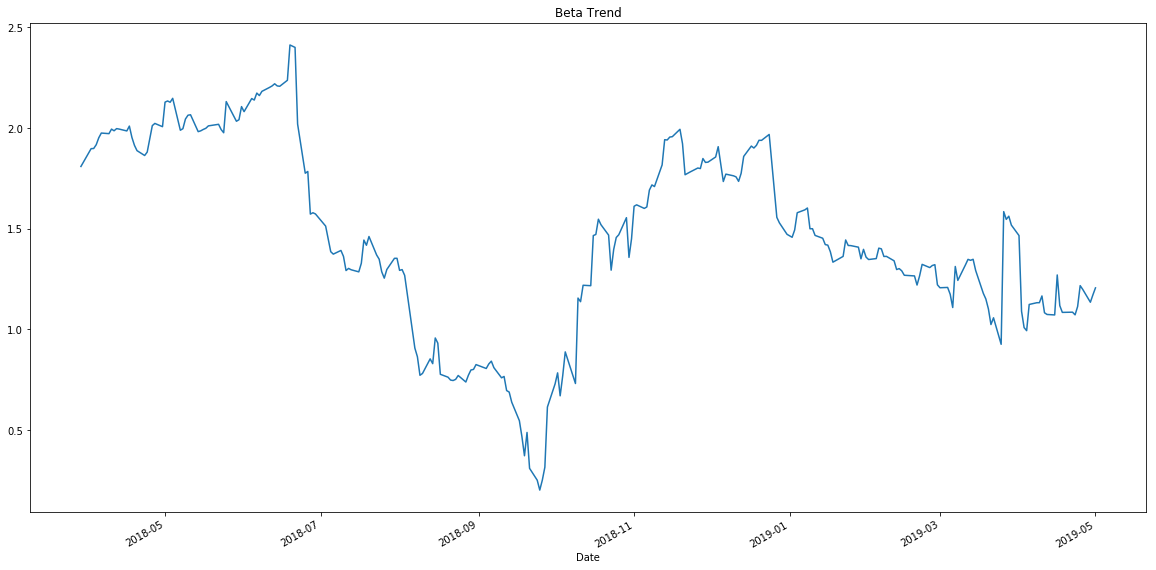

In [48]:
# Calculate and plot Beta

# Calculate covariance of my portfolio
rolling_covariance_2 = combined_df['MY_PORTFOLIO'].rolling(window=60).cov(combined_df['S&P TSX'])

# Calculate variance of S&P TSX
variance_2 = combined_df['S&P TSX'].rolling(window=60).var()

# Computing beta
beta_2 = rolling_covariance_2 / variance_2

# Plot beta trend
beta_2.plot(figsize=(20,10), title="Beta Trend")

### Using the daily returns, we will calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_2 = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios_2

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
MY_PORTFOLIO                   0.319103
dtype: float64

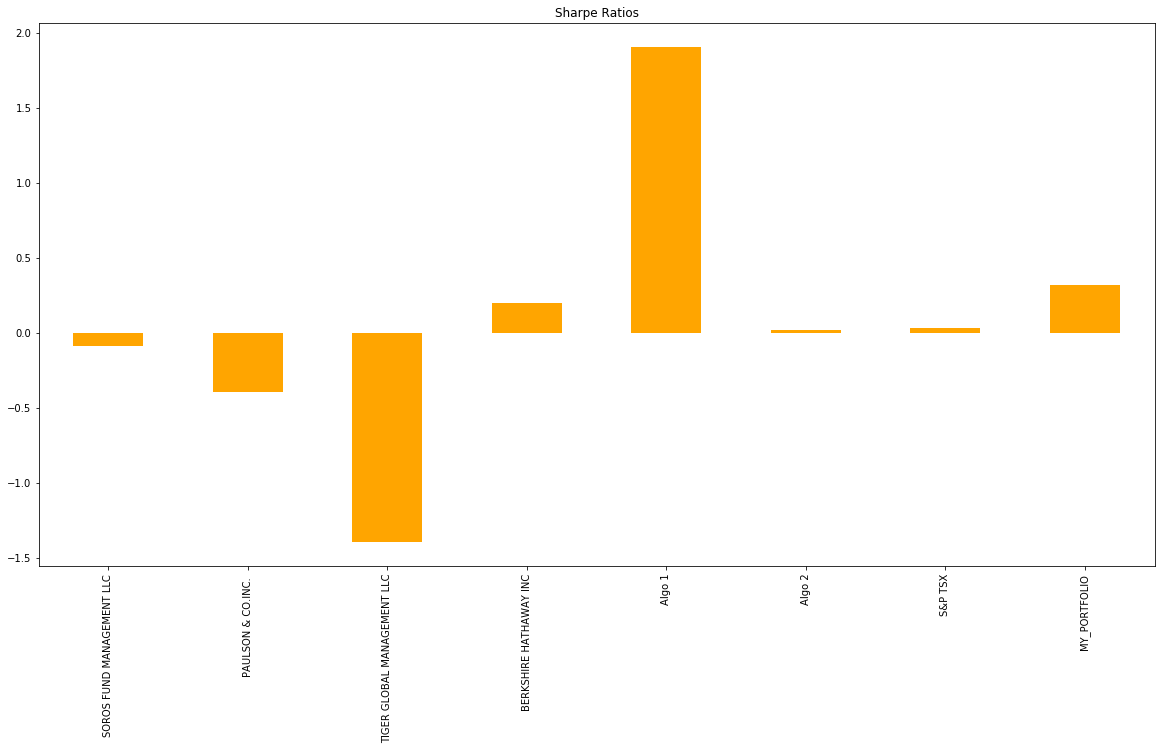

In [50]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(kind="bar", figsize=(20,10), color="orange", title="Sharpe Ratios")

### How does my portfolio do?

Based on the analysis, my portfolio shows less volatility compared to all other portfolios except the Algo 1 from the Algorithm Strategies. However, whether it still performs in the same manner if the weights (for the investment) are shifted is something one can further look into. But based on the current analysis, the Whale portfolio particularly (Soros Fund Management LLC, Paulson & Co Inc, and Tiger Global Management LLC are highly volatile, while the others including my portfolio still manage to to perform at a gain.